# Congress Members Trading Network Community Detection

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import cycle
import matplotlib.cm as cm
import matplotlib

### Load networks and create randomised networks

#### All congress members

In [2]:
all_congress_members_graphs = {}
all_congress_members_graphs["all_members_1day"] = nx.read_gml(
    "../data/internal/networks/all_members_1day.gml"
)
all_congress_members_graphs["all_members_7days"] = nx.read_gml(
    "../data/internal/networks/all_members_7days.gml"
)
all_congress_members_graphs["all_members_14days"] = nx.read_gml(
    "../data/internal/networks/all_members_14days.gml"
)

rand_all_congress_members_graphs = {}
for graph_name, G in all_congress_members_graphs.items():
    rand_all_congress_members_graphs["rand_" + graph_name] = (
        nx.algorithms.smallworld.random_reference(G, connectivity=False)
    )

#### Democrat and Republican members

In [3]:
democrats_graphs = {}
democrats_graphs["democrat_members_1day"] = nx.read_gml(
    "../data/internal/networks/democrat_members_1day.gml"
)
democrats_graphs["democrat_members_7days"] = nx.read_gml(
    "../data/internal/networks/democrat_members_7days.gml"
)
democrats_graphs["democrat_members_14days"] = nx.read_gml(
    "../data/internal/networks/democrat_members_14days.gml"
)

rand_democrats_graphs = {}
for graph_name, G in democrats_graphs.items():
    rand_democrats_graphs["rand_" + graph_name] = nx.algorithms.smallworld.random_reference(
        G, connectivity=False
    )


republicans_graphs = {}
republicans_graphs["republican_members_1day"] = nx.read_gml(
    "../data/internal/networks/republican_members_1day.gml"
)
republicans_graphs["republican_members_7days"] = nx.read_gml(
    "../data/internal/networks/republican_members_7days.gml"
)
republicans_graphs["republican_members_14days"] = nx.read_gml(
    "../data/internal/networks/republican_members_14days.gml"
)

rand_republicans_graphs = {}
for graph_name, G in republicans_graphs.items():
    rand_republicans_graphs["rand_" + graph_name] = nx.algorithms.smallworld.random_reference(
        G, connectivity=False
    )

#### Senators vs. Representatives

In [4]:
senators_graphs = {}
senators_graphs["senators_1day"] = nx.read_gml("../data/internal/networks/senators_1day.gml")
senators_graphs["senators_7days"] = nx.read_gml("../data/internal/networks/senators_7days.gml")
senators_graphs["senators_14days"] = nx.read_gml("../data/internal/networks/senators_14days.gml")

rand_senators_graphs = {}
for graph_name, G in senators_graphs.items():
    rand_senators_graphs["rand_" + graph_name] = nx.algorithms.smallworld.random_reference(
        G, connectivity=False
    )


representatives_graphs = {}
representatives_graphs["representatives_1day"] = nx.read_gml(
    "../data/internal/networks/representatives_1day.gml"
)
representatives_graphs["representatives_7days"] = nx.read_gml(
    "../data/internal/networks/representatives_7days.gml"
)
representatives_graphs["representatives_14days"] = nx.read_gml(
    "../data/internal/networks/representatives_14days.gml"
)

rand_representatives_graphs = {}
for graph_name, G in representatives_graphs.items():
    rand_representatives_graphs["rand_" + graph_name] = nx.algorithms.smallworld.random_reference(
        G, connectivity=False
    )

### Detect and display communities in comparison with randomised networks

In [5]:
# helper functions


def lighten_color(color, amount=0.5):
    color = matplotlib.colors.to_rgba(color)
    return [(1.0 - (1.0 - c) * (1 - amount)) for c in color]


def draw_communities(graph, graph_name, communities, ax):
    color_map = {}

    significant_communities = [community for community in communities if len(community) != 1]

    for i, community in enumerate(significant_communities):
        color = plt.colormaps.get_cmap("Set1")(i)
        for node in community:
            color_map[node] = color

    default_color = (0.0, 0.0, 0.0, 1.0)
    for node in graph.nodes():
        if node not in color_map:
            color_map[node] = default_color

    pos = {}
    community_centers = nx.circular_layout(range(len(significant_communities)))

    scaling_factor = 5
    community_centers = {key: value * scaling_factor for key, value in community_centers.items()}

    nodes_in_significant_communities = set(
        node for community in significant_communities for node in community
    )
    all_nodes = set(graph.nodes())
    leftover_nodes = all_nodes - nodes_in_significant_communities

    for i, community in enumerate(significant_communities):
        subgraph = graph.subgraph(community)
        subgraph_pos = nx.spring_layout(subgraph, k=0.6, scale=1.5)
        center_offset = community_centers[i]

        for node, coords in subgraph_pos.items():
            pos[node] = coords + center_offset

    if leftover_nodes:
        leftover_pos = nx.spring_layout(graph.subgraph(leftover_nodes), scale=1.0)
        for node, coords in leftover_pos.items():
            pos[node] = coords

    modularity = nx.algorithms.community.modularity(graph, communities)
    clustering_coefficient = nx.average_clustering(graph)

    nx.draw_networkx_nodes(
        graph,
        pos,
        nodelist=list(graph.nodes()),
        node_color=[color_map[node] for node in graph.nodes()],
        node_size=20,
        ax=ax,
        alpha=0.8,
    )

    nx.draw_networkx_edges(
        graph, pos, edgelist=list(graph.edges()), edge_color="black", alpha=0.2, ax=ax
    )

    print(f"Graph: {graph_name}")
    print("Number of nodes:", len(graph.nodes()))
    # print(f"All communitiy lengths: {sorted([len(community) for community in communities], reverse=True)}")
    print(f"Number of significant communities: {len(significant_communities)}")
    print(f"Number of leftover nodes: {len(leftover_nodes)}")
    print(f"Modularity: {modularity:.4f}")
    print(f"Clustering coefficient: {clustering_coefficient:.4f}")
    print("-" * 40)

    ax.set_title(f"Communities for {graph_name}")
    ax.axis("off")


def display_graphs_with_communities(graphs: dict):
    _, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

    for ax, (graph_name, G) in zip(axes, graphs.items()):
        communities = list(nx.algorithms.community.louvain.louvain_communities(G))

        draw_communities(G, graph_name, communities, ax)

        ax.set_title(graph_name)

    plt.tight_layout()
    plt.show()


def display_original_vs_randomised_graphs_with_communities(
    original_graphs: dict, randomised_graphs: dict
):
    display_graphs_with_communities(original_graphs)
    display_graphs_with_communities(randomised_graphs)

Graph: all_members_1day
Number of nodes: 353
Number of significant communities: 10
Number of leftover nodes: 164
Modularity: 0.3135
Clustering coefficient: 0.1491
----------------------------------------
Graph: all_members_7days
Number of nodes: 353
Number of significant communities: 9
Number of leftover nodes: 100
Modularity: 0.2451
Clustering coefficient: 0.3051
----------------------------------------
Graph: all_members_14days
Number of nodes: 353
Number of significant communities: 9
Number of leftover nodes: 84
Modularity: 0.2419
Clustering coefficient: 0.3596
----------------------------------------


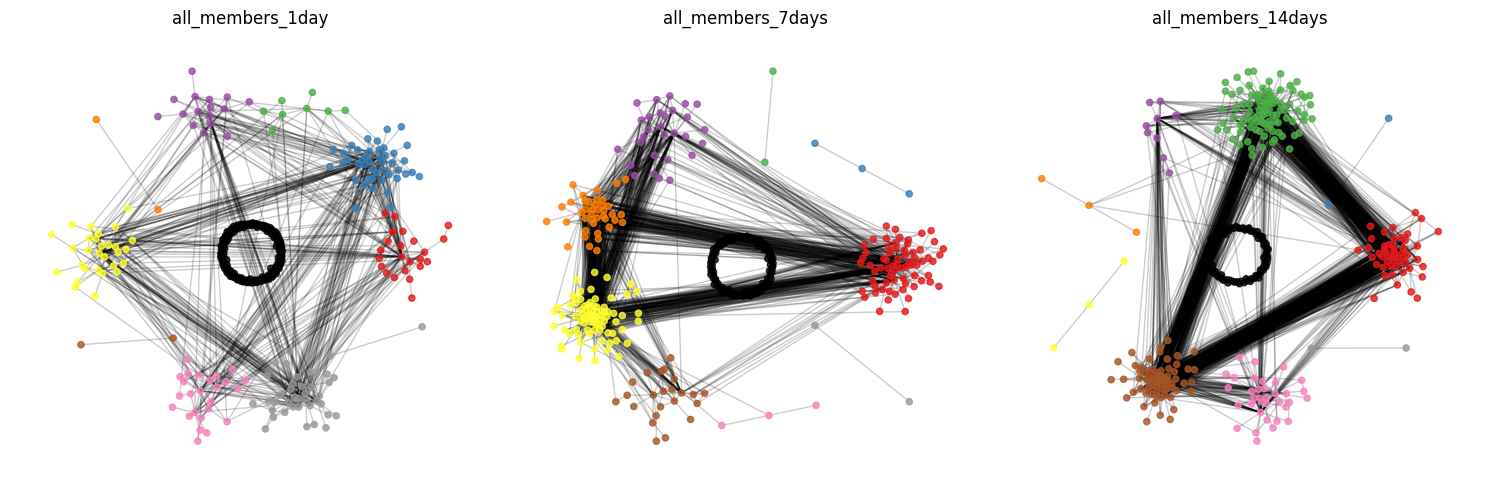

Graph: rand_all_members_1day
Number of nodes: 353
Number of significant communities: 11
Number of leftover nodes: 164
Modularity: 0.2652
Clustering coefficient: 0.0948
----------------------------------------
Graph: rand_all_members_7days
Number of nodes: 353
Number of significant communities: 8
Number of leftover nodes: 100
Modularity: 0.1709
Clustering coefficient: 0.2273
----------------------------------------
Graph: rand_all_members_14days
Number of nodes: 353
Number of significant communities: 8
Number of leftover nodes: 84
Modularity: 0.1448
Clustering coefficient: 0.2767
----------------------------------------


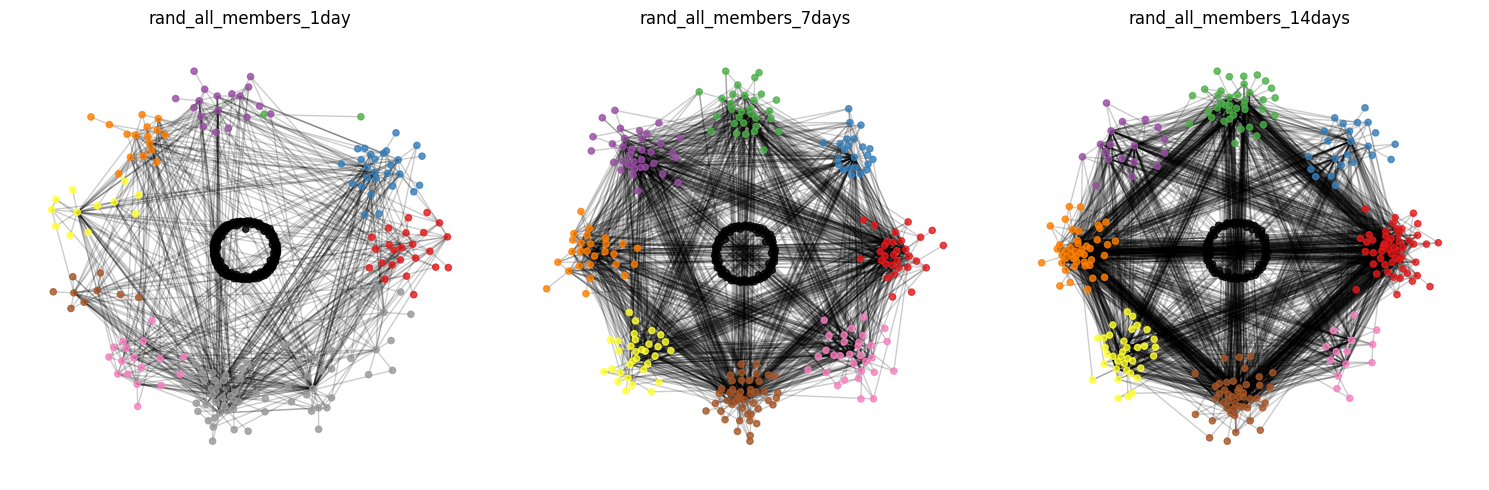

In [6]:
display_original_vs_randomised_graphs_with_communities(
    all_congress_members_graphs, rand_all_congress_members_graphs
)

Graph: democrat_members_1day
Number of nodes: 159
Number of significant communities: 9
Number of leftover nodes: 85
Modularity: 0.3413
Clustering coefficient: 0.1222
----------------------------------------
Graph: democrat_members_7days
Number of nodes: 159
Number of significant communities: 7
Number of leftover nodes: 58
Modularity: 0.2548
Clustering coefficient: 0.2586
----------------------------------------
Graph: democrat_members_14days
Number of nodes: 159
Number of significant communities: 7
Number of leftover nodes: 50
Modularity: 0.2331
Clustering coefficient: 0.3148
----------------------------------------


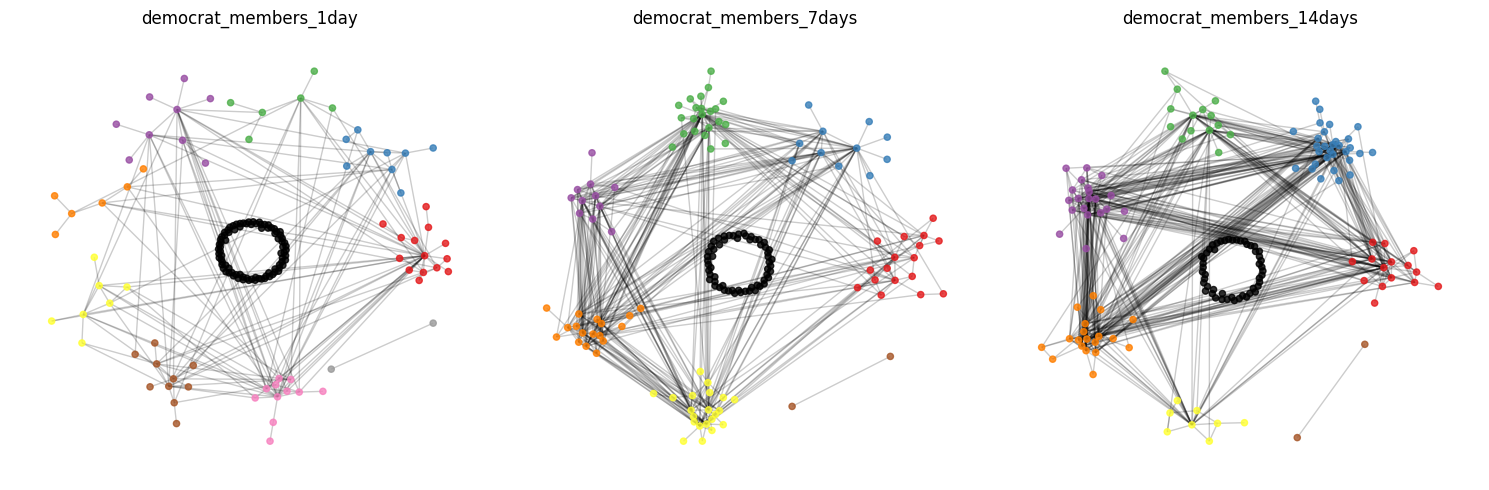

Graph: rand_democrat_members_1day
Number of nodes: 159
Number of significant communities: 7
Number of leftover nodes: 85
Modularity: 0.3336
Clustering coefficient: 0.0773
----------------------------------------
Graph: rand_democrat_members_7days
Number of nodes: 159
Number of significant communities: 7
Number of leftover nodes: 58
Modularity: 0.2078
Clustering coefficient: 0.2185
----------------------------------------
Graph: rand_democrat_members_14days
Number of nodes: 159
Number of significant communities: 7
Number of leftover nodes: 50
Modularity: 0.1792
Clustering coefficient: 0.2676
----------------------------------------


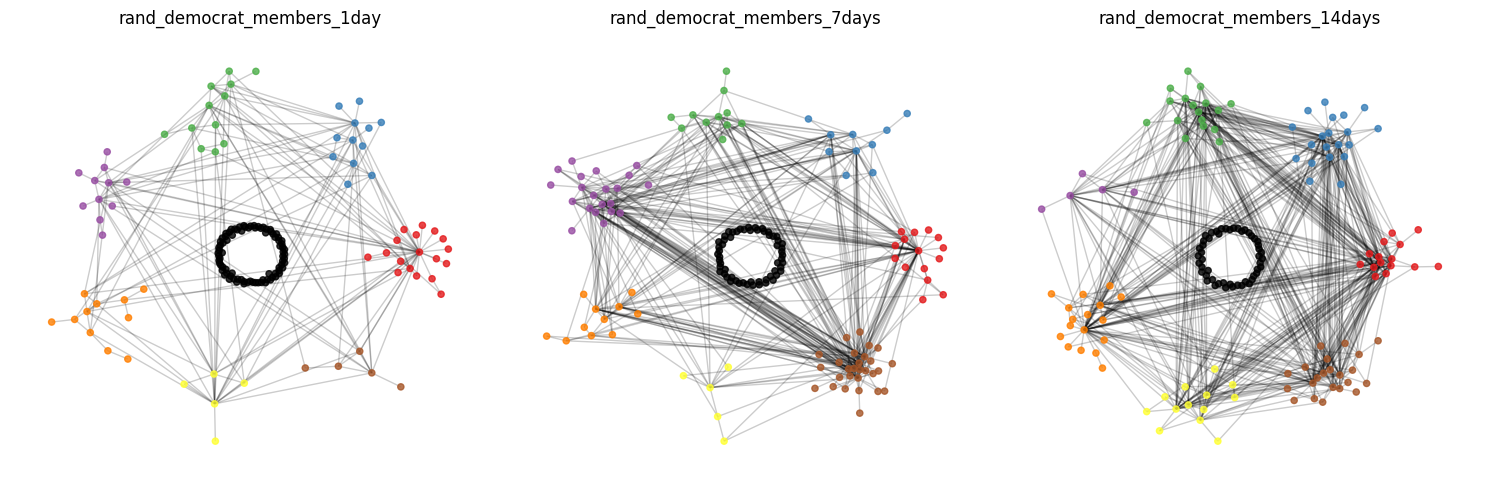

In [7]:
display_original_vs_randomised_graphs_with_communities(democrats_graphs, rand_democrats_graphs)

Graph: republican_members_1day
Number of nodes: 191
Number of significant communities: 10
Number of leftover nodes: 101
Modularity: 0.4030
Clustering coefficient: 0.1186
----------------------------------------
Graph: republican_members_7days
Number of nodes: 191
Number of significant communities: 9
Number of leftover nodes: 69
Modularity: 0.3168
Clustering coefficient: 0.2437
----------------------------------------
Graph: republican_members_14days
Number of nodes: 191
Number of significant communities: 7
Number of leftover nodes: 58
Modularity: 0.3044
Clustering coefficient: 0.3159
----------------------------------------


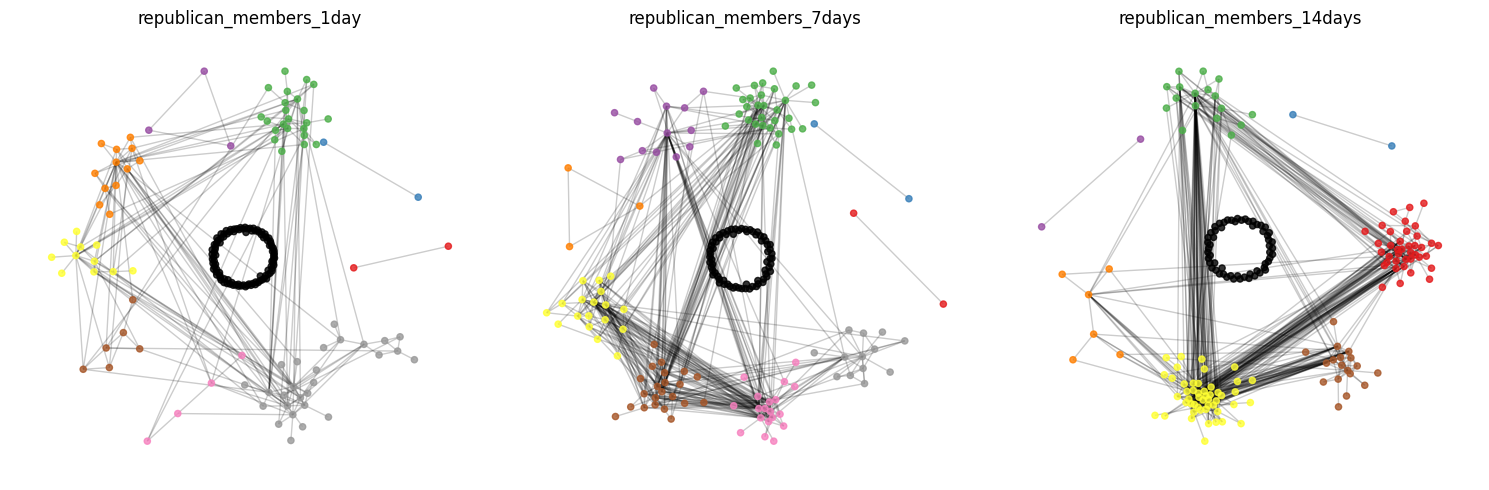

Graph: rand_republican_members_1day
Number of nodes: 191
Number of significant communities: 7
Number of leftover nodes: 101
Modularity: 0.3583
Clustering coefficient: 0.0514
----------------------------------------
Graph: rand_republican_members_7days
Number of nodes: 191
Number of significant communities: 7
Number of leftover nodes: 69
Modularity: 0.2616
Clustering coefficient: 0.1366
----------------------------------------
Graph: rand_republican_members_14days
Number of nodes: 191
Number of significant communities: 7
Number of leftover nodes: 58
Modularity: 0.2075
Clustering coefficient: 0.1802
----------------------------------------


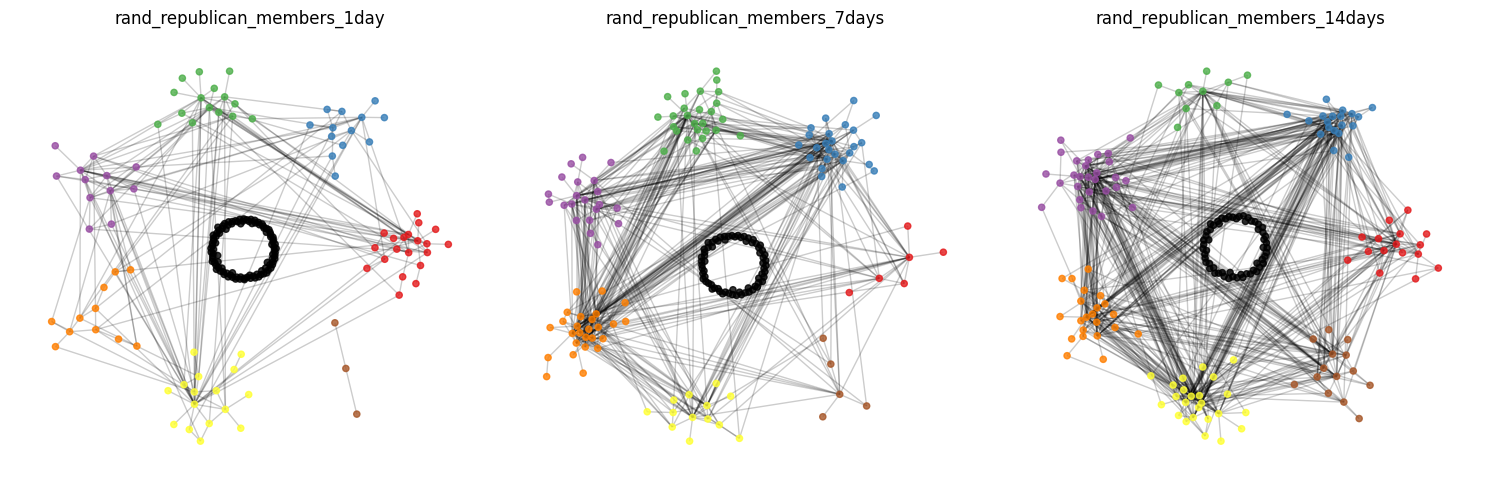

In [8]:
display_original_vs_randomised_graphs_with_communities(republicans_graphs, rand_republicans_graphs)

Graph: senators_1day
Number of nodes: 63
Number of significant communities: 5
Number of leftover nodes: 35
Modularity: 0.3531
Clustering coefficient: 0.0961
----------------------------------------
Graph: senators_7days
Number of nodes: 63
Number of significant communities: 4
Number of leftover nodes: 29
Modularity: 0.2330
Clustering coefficient: 0.2366
----------------------------------------
Graph: senators_14days
Number of nodes: 63
Number of significant communities: 5
Number of leftover nodes: 26
Modularity: 0.2007
Clustering coefficient: 0.2642
----------------------------------------


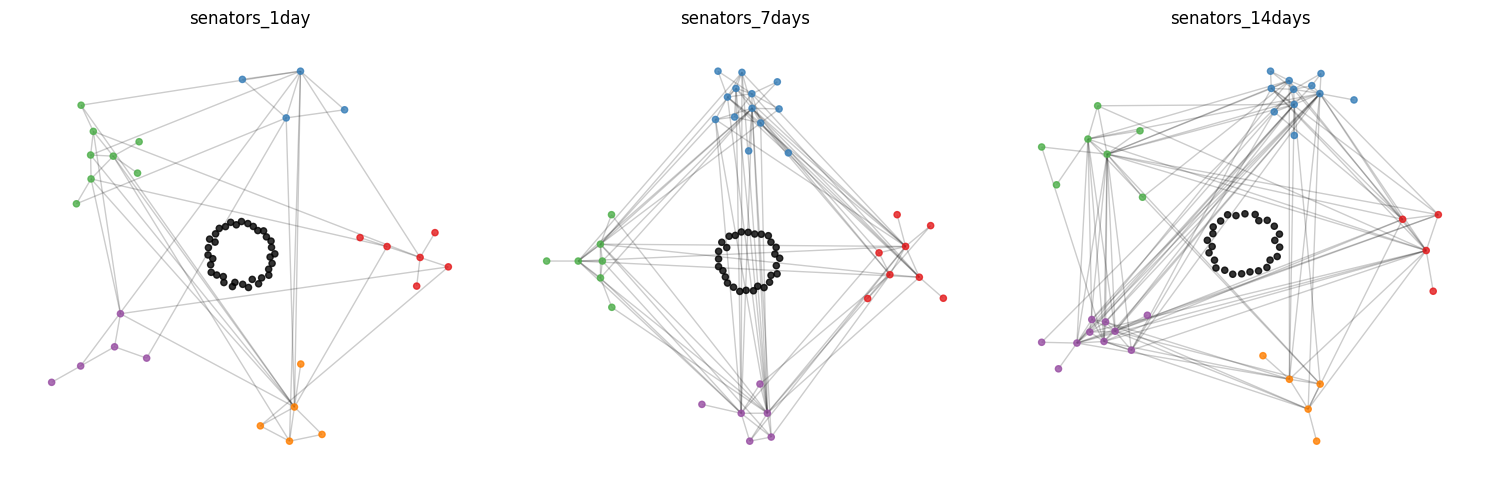

Graph: rand_senators_1day
Number of nodes: 63
Number of significant communities: 4
Number of leftover nodes: 35
Modularity: 0.3454
Clustering coefficient: 0.1340
----------------------------------------
Graph: rand_senators_7days
Number of nodes: 63
Number of significant communities: 4
Number of leftover nodes: 29
Modularity: 0.2238
Clustering coefficient: 0.2165
----------------------------------------
Graph: rand_senators_14days
Number of nodes: 63
Number of significant communities: 5
Number of leftover nodes: 26
Modularity: 0.2067
Clustering coefficient: 0.2285
----------------------------------------


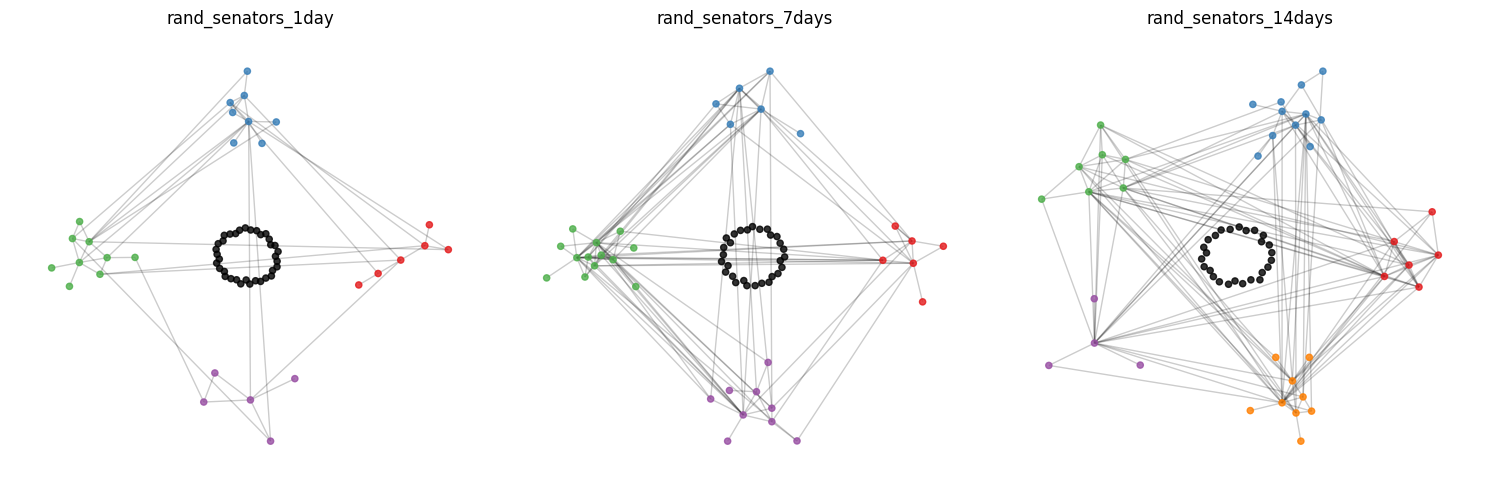

In [9]:
display_original_vs_randomised_graphs_with_communities(senators_graphs, rand_senators_graphs)

Graph: representatives_1day
Number of nodes: 292
Number of significant communities: 10
Number of leftover nodes: 143
Modularity: 0.3672
Clustering coefficient: 0.1199
----------------------------------------
Graph: representatives_7days
Number of nodes: 292
Number of significant communities: 9
Number of leftover nodes: 93
Modularity: 0.2824
Clustering coefficient: 0.2756
----------------------------------------
Graph: representatives_14days
Number of nodes: 292
Number of significant communities: 9
Number of leftover nodes: 76
Modularity: 0.2738
Clustering coefficient: 0.3408
----------------------------------------


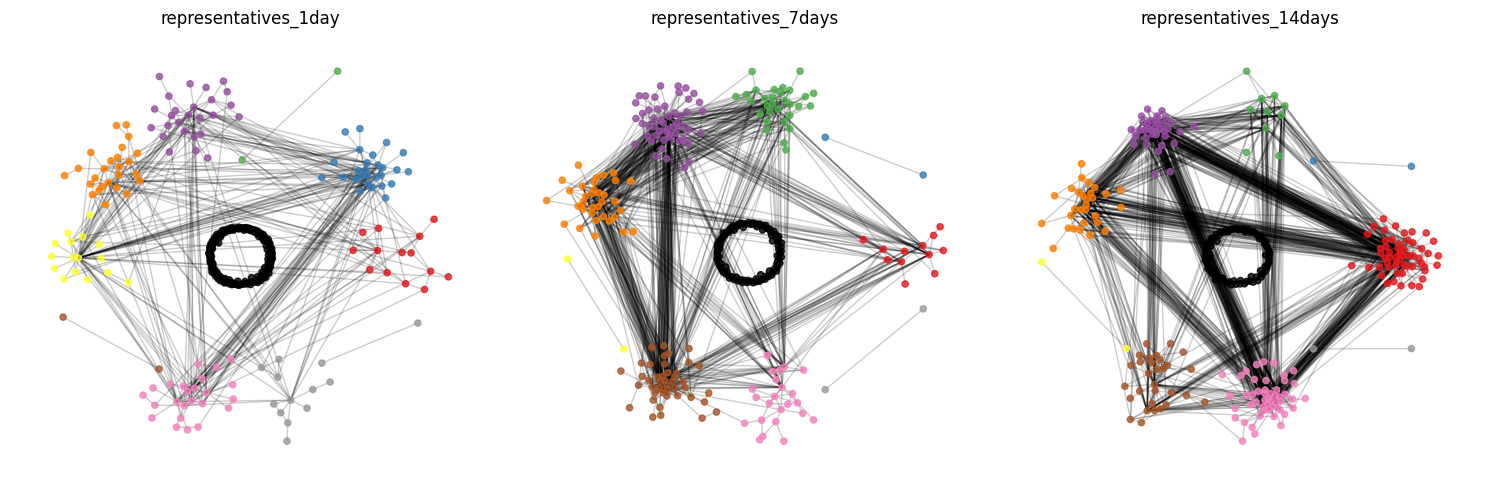

Graph: rand_representatives_1day
Number of nodes: 292
Number of significant communities: 8
Number of leftover nodes: 143
Modularity: 0.3404
Clustering coefficient: 0.0885
----------------------------------------
Graph: rand_representatives_7days
Number of nodes: 292
Number of significant communities: 9
Number of leftover nodes: 93
Modularity: 0.2101
Clustering coefficient: 0.1997
----------------------------------------
Graph: rand_representatives_14days
Number of nodes: 292
Number of significant communities: 8
Number of leftover nodes: 76
Modularity: 0.1705
Clustering coefficient: 0.2431
----------------------------------------


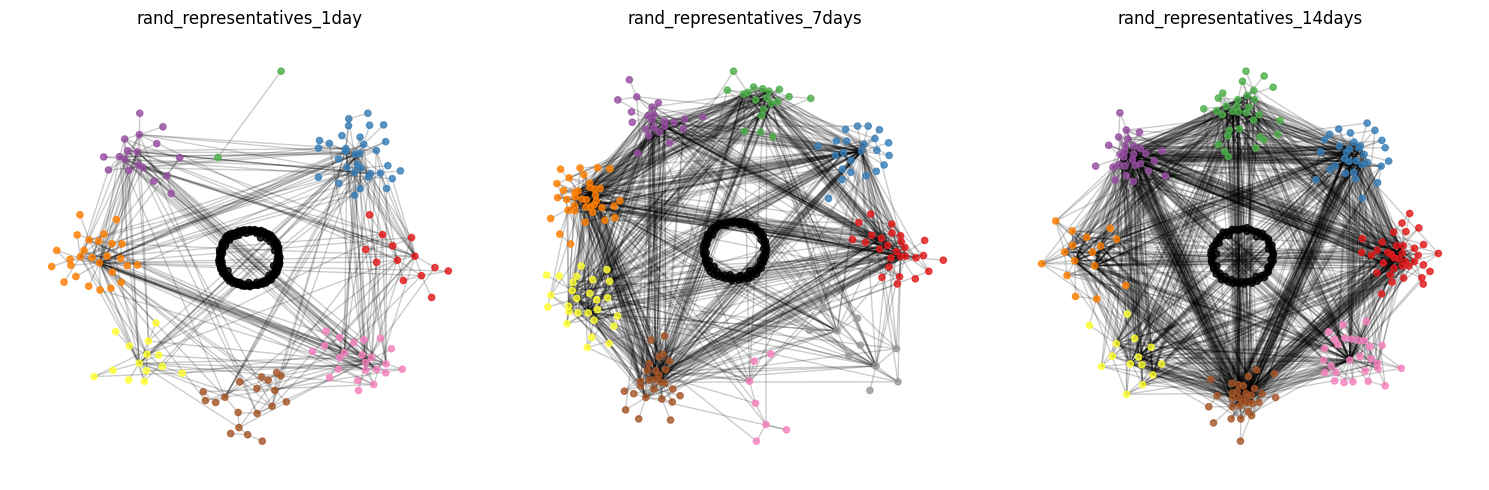

In [10]:
display_original_vs_randomised_graphs_with_communities(
    representatives_graphs, rand_representatives_graphs
)